NOTE! if some library is not working, install it with command:
* pip install  [name of the library]

In [3]:
#libraries

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,  ConfusionMatrixDisplay  #imported to show confusion matrix
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt


functions

In [4]:
#k-fold CV function
def k_fold_cross_validation(model,X, y, k, type_score='acc'):
    """
    Function k-fold cross validation.
    
    Parameters:
    model: The model to use for prediction.
    X: The features in the dataset.
    y: The labels in the dataset.
    k: The number of folds to split the data.
    type_score: The type of score to calculate. Default is 'acc' for accuracy. 
    If 'err' is provided, then the error rate is calculated.
    
    Returns:
    [mean_metric_train, mean_metric_valid]: A list containing the mean metrics 
    for the training and validation sets respectively.
    """
    
    n = len(y)
    np.random.seed(123)
    fold_size = n // k # how many data in one fold
    metrics = []
    
    for i in range(k):
        # indices for current fold as a validation set
        start = i * fold_size
        end = start + fold_size if i < k-1 else n
        
        # current fold as a validation set
        X_valid = X[start:end]
        y_valid = y[start:end]
        
        # the rest of folds as training set
        X_train = np.vstack((X[:start], X[end:]))
        y_train= np.hstack((y[:start], y[end:]))
        
        model.fit(X_train, y_train)
        
        y_pred_train = model.predict(X_train)
        
        # Make predictions on the test data
        y_pred = model.predict(X_valid)
        
        if type_score=='acc':
            # Calculate accuracy
            acc_train = accuracy_score(y_train, y_pred_train)
            acc_valid= accuracy_score(y_valid,y_pred)
            metrics.append([acc_train,acc_valid])
        elif type_score=='err':
            err_train = 1- accuracy_score(y_train, y_pred_train)
            err_valid= 1- accuracy_score(y_valid,y_pred)
            metrics.append([err_train,err_valid])
            
    mean_metric_train = np.mean([acc[0] for acc in metrics])
    mean_metric_valid= np.mean([acc[1] for acc in metrics])
    return [mean_metric_train, mean_metric_valid]

# TASK 1

### digits dataset information

In [7]:

digits = datasets.load_digits()
print(digits['DESCR'])

# Split 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42,shuffle=True)



.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [8]:
#how many classes are in the dataset

uniq_vals= np.unique(y_train)
for i in uniq_vals:
    print(f"Number of features with label {i}:",np.count_nonzero(y_train == i))

print("Classes in dataset: ",len(uniq_vals))

Number of features with label 0: 125
Number of features with label 1: 132
Number of features with label 2: 130
Number of features with label 3: 129
Number of features with label 4: 121
Number of features with label 5: 116
Number of features with label 6: 128
Number of features with label 7: 124
Number of features with label 8: 131
Number of features with label 9: 121
Classes in dataset:  10


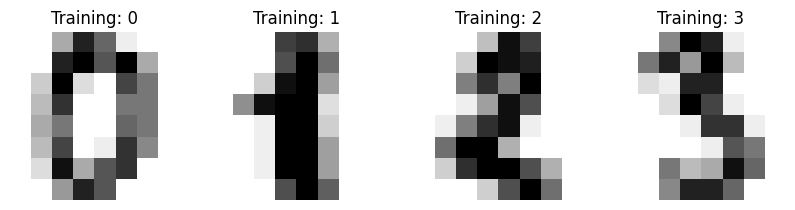

In [5]:
#how does the dataset look like
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [9]:
# SVM classifier
svm_classifier = SVC()

svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy*100:.5f}%")

svm = SVC()


Accuracy on test set: 98.70370%


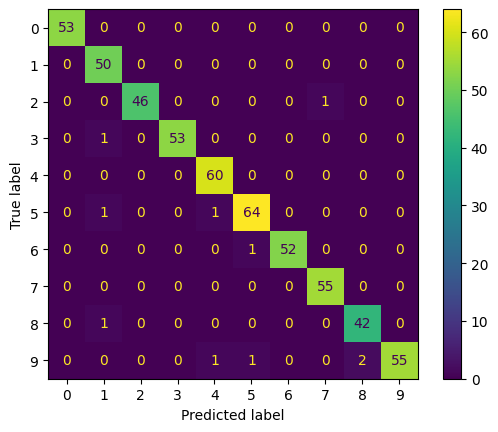

In [148]:
#checking confusion matrix
c_m = confusion_matrix(y_test, y_pred, labels=svm_classifier.classes_)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=c_m,
                               display_labels=svm_classifier.classes_)
conf_matrix.plot()
plt.show()

## **subtask 1**

-----------------------------------------------------------------------------------------------------------------------
### **REPORT**

1. Hyperparameters were selected based on the cross-validation accuracy rate for validation set, cross-validation was applied through a custom implementation for k-fold CV.  Results achieved:

*  Kernel: linear, Best Hyperparameters: {'C': 0.1, 'gamma': 0.001}, Validation Accuracy: 97.13840%

    Model: linear, Train Accuracy: 100.00000%, Test Accuracy: 97.96296%

*   Kernel: poly, Best Hyperparameters: {'C': 0.001, 'gamma': 0.01, 'degree': 4}, Validation Accuracy: 98.56889%

    Model: poly, Train Accuracy: 100.00000%, Test Accuracy: 98.70370%

*   Kernel: rbf, Best Hyperparameters: {'C': 10, 'gamma': 0.001}, Validation Accuracy: 99.20445%

    Model: rbf, Train Accuracy: 100.00000%, Test Accuracy: 99.07407%

*   Kernel: sigmoid, Best Hyperparameters: {'C': 1, 'gamma': 0.001}, Validation Accuracy: 63.56645%

    Model: sigmoid, Train Accuracy: 69.61018%, Test Accuracy: 70.92593%


**Overall, RBF achieved the highest accuracy score with c=10, gamma=0.001.**

NOTE: (in order to check how other hyperparameters performed, one can uncomment the lines:  #print(C,gamma,accuracy_valid)/  #print(C,gamma,degree, accuracy_valid))

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def kernel_selection(kernel, X_train, y_train, X_test, y_test, C_values=[0.1, 0.5, 1, 5, 10], gamma_values=[0.001, 0.01, 0.05, 0.1, 0.1], degree_values=[2, 3, 4, 5], folds=5):
    """
    Selects the best hyperparameters for an SVM kernel using k-fold cross-validation.

    Parameters:
    - kernel: SVM kernel type.
    - X_train: Training data.
    - y_train: Training labels.
    - X_test: Test data.
    - y_test: Test labels.
    - C_values: List of C values to try.
    - gamma_values: List of gamma values to try.
    - degree_values: List of degree values to try (for polynomial kernel).
    - folds: Number of folds for k-fold cross-validation.

    Returns:
    - best_params (dict): Dictionary containing the best hyperparameters.
    """

    # set of hyperparameters to try for the kernel
    hypp_candidates = {'C': C_values, 'gamma': gamma_values}

    if kernel == 'poly':
        hypp_candidates['degree'] = degree_values

    #best accuracy and corresponding hyperparameters
    best_accuracy = 0
    best_hyperparameters = None

    # Iterate over hyperparameter combinations
    for C in hypp_candidates['C']:
        for gamma in hypp_candidates['gamma']:
            #case kernel polynomial we select also the best degree
            if kernel == 'poly':
                for degree in hypp_candidates['degree']:
                    # SVM classifier with the current kernel and hyperparameters
                    svm_classifier = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
                    accuracy_train, accuracy_valid = k_fold_cross_validation(svm_classifier, X_train, y_train, folds, type_score='acc')
                   
                    #print(C,gamma,degree,accuracy_valid)
            
            else:
                svm_classifier = SVC(kernel=kernel, C=C, gamma=gamma)
            # perform k-fold cross-validation and get mean accuracy
                accuracy_train, accuracy_valid = k_fold_cross_validation(svm_classifier, X_train, y_train, folds, type_score='acc')
                
                #print(C,gamma,accuracy_valid)


            # update best accuracy and corresponding hyperparameters if the current model is better
            if accuracy_valid > best_accuracy:
                best_accuracy = accuracy_valid
                if kernel == 'poly':
                    best_hyperparameters = {'C': C, 'gamma': gamma, 'degree': degree}
                    
                else:
                    best_hyperparameters = {'C': C, 'gamma': gamma}

    print(f"Kernel: {kernel}, Best Hyperparameters: {best_hyperparameters}, Validation Accuracy: {best_accuracy*100:.5f}%")

    #final model on the full training set with the best hyperparameters
    final_svm_classifier = SVC(kernel=kernel, **best_hyperparameters)
    final_svm_classifier.fit(X_train, y_train)

    #evaluation
    train_accuracy = accuracy_score(y_train, final_svm_classifier.predict(X_train))
    test_accuracy = accuracy_score(y_test, final_svm_classifier.predict(X_test))

    print(f'Model: {kernel}, Train Accuracy: {train_accuracy*100:.5f}%, Test Accuracy: {test_accuracy*100:.5f}%')
    print()

    return best_hyperparameters

Cs=[0.001,0.01,0.1, 1, 10]
gammas=[0.001,0.01,0.1, 1]
degrees=[2,3,4,5]

best_params_linear = kernel_selection('linear', X_train, y_train, X_test, y_test, C_values=Cs, gamma_values=gammas)
best_params_poly = kernel_selection('poly', X_train, y_train, X_test, y_test,C_values=Cs, gamma_values=gammas, degree_values=degrees)
best_params_rbf = kernel_selection('rbf', X_train, y_train, X_test, y_test,C_values=Cs, gamma_values=gammas)
best_params_sigmoid = kernel_selection('sigmoid', X_train, y_train, X_test, y_test, C_values=Cs, gamma_values=gammas)


Kernel: linear, Best Hyperparameters: {'C': 0.1, 'gamma': 0.001}, Validation Accuracy: 97.13840%
Model: linear, Train Accuracy: 100.00000%, Test Accuracy: 97.96296%

Kernel: poly, Best Hyperparameters: {'C': 0.001, 'gamma': 0.01, 'degree': 4}, Validation Accuracy: 98.56889%
Model: poly, Train Accuracy: 100.00000%, Test Accuracy: 98.70370%

Kernel: rbf, Best Hyperparameters: {'C': 10, 'gamma': 0.001}, Validation Accuracy: 99.20445%
Model: rbf, Train Accuracy: 100.00000%, Test Accuracy: 99.07407%

Kernel: sigmoid, Best Hyperparameters: {'C': 1, 'gamma': 0.001}, Validation Accuracy: 63.56645%
Model: sigmoid, Train Accuracy: 69.61018%, Test Accuracy: 70.92593%



## **subtask 2**

### **REPORT**

1. Description of the Kernel:

    The implemented kernel is a combination of a sharpening filter and the polynomial kernel. The sharpening filter is applied to each image in the dataset, enhancing the details. The sharpening matrix is created in a way that increased the level of accuracy in the model. In the final form of the sharpening matrix, a higher level of accuracy has been achieved compared to other kernels. Then, the sharpened X set is also used as input to the polynomial kernel with a degree of 3. The combination of sharpening and polynomial features aims to capture more complex relationships in the data.

2. A valid kernel must satisfy the condition, which ensures that the kernel matrix is positive semi-definite. The polynomial kernel is a valid kernel, and the combination(here summation of two kernels) of the sharpening filter and the polynomial kernel maintains this validity.

    Sharpening Filter:
        The sharpening filter itself does not change the positive semi-definiteness of the kernel. It enhances existing features without introducing negative eigenvalues.

    Polynomial Kernel:
        The polynomial kernel is known to be positive semi-definite (proved in P&P exercise sheet)

    Combination:
        The combination of valid kernels (sharpening and polynomial) through addition (proved in P&P exercise sheet) results in a valid kernel.
3. Using described above kernel, the result of accuracy = **99.25926% on test set** was achieved, and parameters for SVC were selected with respect to previous subtask for polynomial kernel

checking features

In [10]:
# Print the index and name of each feature
for idx, feature_name in enumerate(digits.feature_names):
    print(f"Index: {idx} : {feature_name}")


Index: 0 : pixel_0_0
Index: 1 : pixel_0_1
Index: 2 : pixel_0_2
Index: 3 : pixel_0_3
Index: 4 : pixel_0_4
Index: 5 : pixel_0_5
Index: 6 : pixel_0_6
Index: 7 : pixel_0_7
Index: 8 : pixel_1_0
Index: 9 : pixel_1_1
Index: 10 : pixel_1_2
Index: 11 : pixel_1_3
Index: 12 : pixel_1_4
Index: 13 : pixel_1_5
Index: 14 : pixel_1_6
Index: 15 : pixel_1_7
Index: 16 : pixel_2_0
Index: 17 : pixel_2_1
Index: 18 : pixel_2_2
Index: 19 : pixel_2_3
Index: 20 : pixel_2_4
Index: 21 : pixel_2_5
Index: 22 : pixel_2_6
Index: 23 : pixel_2_7
Index: 24 : pixel_3_0
Index: 25 : pixel_3_1
Index: 26 : pixel_3_2
Index: 27 : pixel_3_3
Index: 28 : pixel_3_4
Index: 29 : pixel_3_5
Index: 30 : pixel_3_6
Index: 31 : pixel_3_7
Index: 32 : pixel_4_0
Index: 33 : pixel_4_1
Index: 34 : pixel_4_2
Index: 35 : pixel_4_3
Index: 36 : pixel_4_4
Index: 37 : pixel_4_5
Index: 38 : pixel_4_6
Index: 39 : pixel_4_7
Index: 40 : pixel_5_0
Index: 41 : pixel_5_1
Index: 42 : pixel_5_2
Index: 43 : pixel_5_3
Index: 44 : pixel_5_4
Index: 45 : pixel_5_

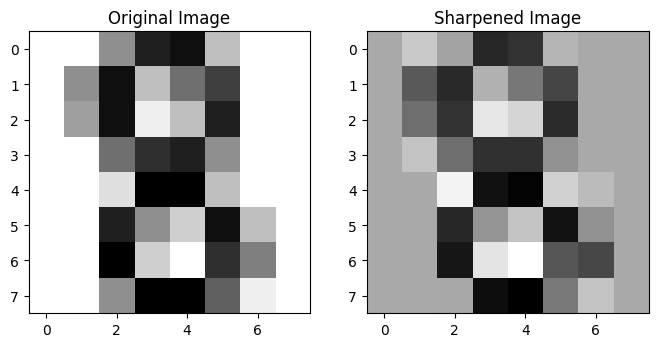

Accuracy: 99.25926%


In [149]:

def create_sharpening_matrix(alpha=1):
    """
    Function to create a sharpening matrix with a specified alpha value
    """
    sharpening_matrix = np.array([[0, -1.5*alpha, 0],
                                  [0, 5* alpha, 0],
                                  [0, -1.5*alpha, 0]])
    return sharpening_matrix


def apply_sharpening(image, sharpening_matrix):

    """   
    Function to apply a sharpening filter to an input image
    """

    #pad the image to handle edge pixels
    padded_image = np.pad(image.reshape(8, 8), pad_width=1, mode='edge') 

    sharpened_image = np.zeros((8, 8))
    
    # Iterate over the pixels of the image
    for i in range(1, 9):
        for j in range(1, 9):
            # Apply the sharpening matrix to the local region of the image
            sharpened_image[i - 1, j - 1] = np.sum(padded_image[i - 1:i + 2, j - 1:j + 2] * sharpening_matrix)

    return sharpened_image.flatten()


def sharpened_kernel(X, Y, alpha=1):
    sharpening_matrix = create_sharpening_matrix(alpha)
    # Apply the sharpening filter to each image in X
    sharpened_X = np.array([apply_sharpening(image, sharpening_matrix) for image in X])
    K_poly = (np.dot(sharpened_X, Y.T) + 1) ** 3
    
    # Return the sum of the sharpened and polynomial kernel matrices
    return np.dot(sharpened_X,Y.T) + K_poly



# Choose an example image to demonstrate the sharpening effect
example_image = X_train[24].reshape(8, 8)

x=create_sharpening_matrix(alpha=1)
# Apply sharpening filter to the example image
sharpened_example = apply_sharpening(example_image,x)

# Display the original and sharpened images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(example_image, cmap=plt.cm.gray_r, interpolation="nearest")
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_example.reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
plt.title('Sharpened Image')

plt.show()


C = 0.001
gamma = 0.01
# SVM classifier with the sharpened RBF kernel
svm_classifier_cust = SVC(kernel=sharpened_kernel, C=C,gamma=gamma)
svm_classifier_cust.fit(X_train, y_train)

# Predict on the test set
y_pred_cust = svm_classifier_cust.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_cust)
print(f"Accuracy: {accuracy*100:.5f}%")



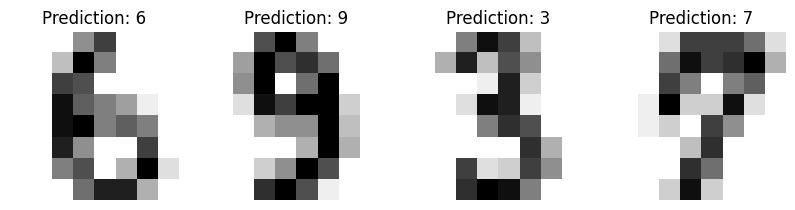

In [150]:
#Looking at classified data
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred_cust):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

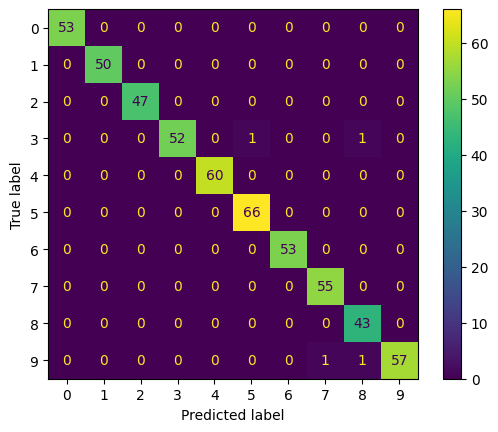

In [151]:
#checking again confusion matrix, good for comparison with the confusion matrix for LinearSVC at the beginning of the exercise
c_m = confusion_matrix(y_test, y_pred_cust, labels=svm_classifier_cust.classes_)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=c_m,
                               display_labels=svm_classifier_cust.classes_)
conf_matrix.plot()
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------
# TASK 2

In [153]:
# Load the breast cancer dataset
cancer = datasets.load_breast_cancer(as_frame=True)

print(cancer['DESCR'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [155]:
# Normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(cancer.data)

X=X_scaled
y=cancer.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, shuffle=True, random_state=42)

linear_svc = LinearSVC()

# Train
linear_svc.fit(X_train, y_train)

# Predictions
y_pred = linear_svc.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set with linear SVC: {accuracy*100:.5f}%")

Accuracy on test set with linear SVC: 98.24561%


### correlation matrix to familiarize with the features


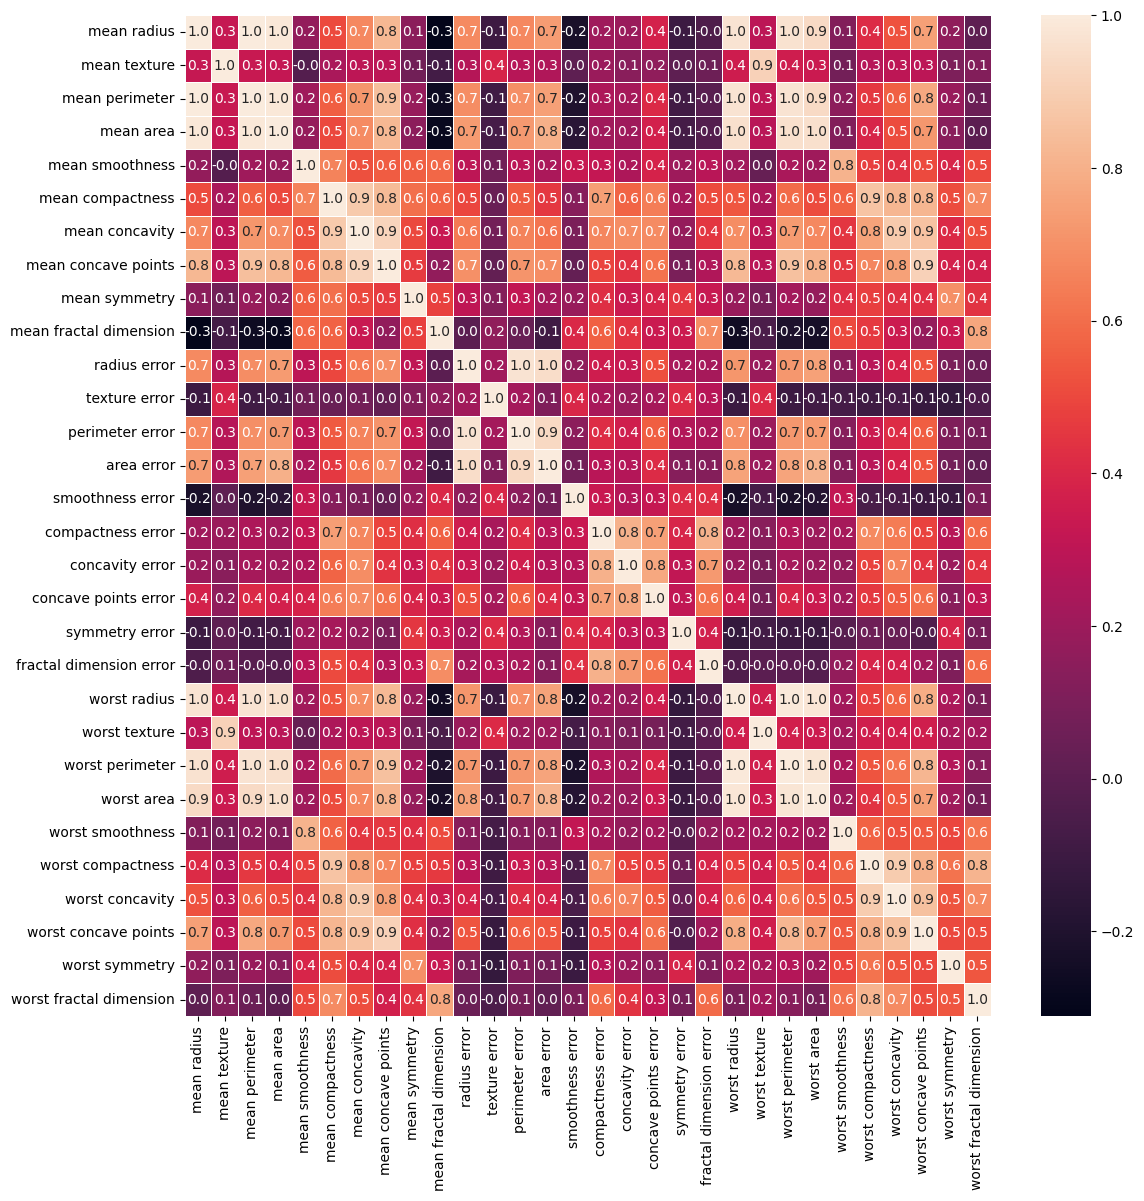

In [156]:
f, ax = plt.subplots(figsize = ((13,13)))
ax = sns.heatmap(cancer.data.corr(),annot = True,linewidths=.4,fmt= '.1f')

### showing indices of features and corresponding names

In [157]:
# Print the index and name of each feature
for idx, feature_name in enumerate(cancer.feature_names):
    print(f"Index: {idx} : {feature_name}")


Index: 0 : mean radius
Index: 1 : mean texture
Index: 2 : mean perimeter
Index: 3 : mean area
Index: 4 : mean smoothness
Index: 5 : mean compactness
Index: 6 : mean concavity
Index: 7 : mean concave points
Index: 8 : mean symmetry
Index: 9 : mean fractal dimension
Index: 10 : radius error
Index: 11 : texture error
Index: 12 : perimeter error
Index: 13 : area error
Index: 14 : smoothness error
Index: 15 : compactness error
Index: 16 : concavity error
Index: 17 : concave points error
Index: 18 : symmetry error
Index: 19 : fractal dimension error
Index: 20 : worst radius
Index: 21 : worst texture
Index: 22 : worst perimeter
Index: 23 : worst area
Index: 24 : worst smoothness
Index: 25 : worst compactness
Index: 26 : worst concavity
Index: 27 : worst concave points
Index: 28 : worst symmetry
Index: 29 : worst fractal dimension


## **subtask 1 forward greedy**

**REPORT**

**Forward Feature Selection**:

    In each iteration, the algorithm selects the feature that, when added to the previously selected features, minimizes the cross-validation error.

    
1. there are two implementations for forward greedy feature selection algorithm, one with my own implementation of k-fold cross validation, and other with already implemented cross_val_score from sklearn.model_selection. That's why the results differ when it comes to selecting better features as score is calculated a bit differently. I will refer to my own implementation of k-fold cross validation. 

* The results are below, but first selected feature with the lowest error rate was feature: 7: 'mean concave points',

    Cross-Validation Error: 0.08587015821058372

* and the last one added 1: 'mean texture' 

    The order of selected features:  ['mean concave points', 'worst texture', 'worst radius', 'worst concavity', 'compactness error', 'mean radius', 'mean smoothness', 'mean concavity', 'mean compactness', 'mean perimeter', 'fractal dimension error', 'worst symmetry', 'area error', 'mean area', 'texture error', 'worst area', 'radius error', 'concavity error', 'worst smoothness', 'worst concave points', 'mean symmetry', 'perimeter error', 'smoothness error', 'concave points error', 'symmetry error', 'worst fractal dimension', 'worst perimeter', 'worst compactness', 'mean fractal dimension', 'mean texture']

    Cross-Validation Error: 0.02564102564102565 



### implementation using my k-fold CV

In [159]:
def custom_forward_feature_selection(X, y, num_to_select):
    # Set up the forward greedy feature selection algorithm
    num_features = X.shape[1]
    selected_features = []
    cross_val_errors = []

    # Initialize with a high initial error
    current_error = np.inf

    # Define the SVM classifier (LinearSVC)
    svm_classifier = LinearSVC()

    # Forward greedy feature selection
    for i in range(num_to_select):
        best_feature = None
        best_error = np.inf

        for feature in range(num_features):
            if feature not in selected_features:
                candidate_features = selected_features + [feature]
                X_subset = X[:, candidate_features]
                # Calculate cross-validation error
                acc_train, acc_valid =k_fold_cross_validation(svm_classifier, X_subset, y, 10, 'err')
                avg_error = acc_valid
                # print(f"{cancer.feature_names[feature]}: error: {avg_error}" )

                if avg_error < best_error:
                    best_error = avg_error
                    best_feature = feature

        # Update the selected features and current error
        selected_features.append(best_feature)
        current_error = best_error
        cross_val_errors.append(current_error)
        names=[cancer.feature_names[idx] for idx in selected_features]
        print(f" {len(selected_features)} Selected Features, added: {best_feature}: {names},\nCross-Validation Error: {current_error}")
        print()

    
    # forward_feature_names = [cancer.feature_names[idx] for idx in selected_features]
    # print(f"Forward Selected Features: {selected_features}, Feature Names: {forward_feature_names}")


custom_forward_feature_selection(X_train,y_train,30)

 1 Selected Features, added:7: ['mean concave points'],
Cross-Validation Error: 0.08587015821058372

 2 Selected Features, added:21: ['mean concave points', 'worst texture'],
Cross-Validation Error: 0.0641025641025641

 3 Selected Features, added:20: ['mean concave points', 'worst texture', 'worst radius'],
Cross-Validation Error: 0.03802509547190398

 4 Selected Features, added:26: ['mean concave points', 'worst texture', 'worst radius', 'worst concavity'],
Cross-Validation Error: 0.03246044735406438

 5 Selected Features, added:15: ['mean concave points', 'worst texture', 'worst radius', 'worst concavity', 'compactness error'],
Cross-Validation Error: 0.027332242225859248

 6 Selected Features, added:0: ['mean concave points', 'worst texture', 'worst radius', 'worst concavity', 'compactness error', 'mean radius'],
Cross-Validation Error: 0.027332242225859248

 7 Selected Features, added:4: ['mean concave points', 'worst texture', 'worst radius', 'worst concavity', 'compactness error'

### implementation using sklearn cross_val_score

In [160]:
def forward_feature_selection(X, y, num_to_select):
    # Set up the forward greedy feature selection algorithm
    num_features = X.shape[1]
    selected_features = []
    cross_val_errors = []

    # Initialize with a high initial error
    current_error = np.inf

    # Define the SVM classifier (LinearSVC)
    svm_classifier = LinearSVC()

    # Forward greedy feature selection
    for i in range(num_to_select):
        best_feature = None
        best_error = np.inf

        for feature in range(num_features):
            if feature not in selected_features:
                candidate_features = selected_features + [feature]
                X_subset = X[:, candidate_features]
                # Calculate cross-validation error
                errors = cross_val_score(svm_classifier, X_subset, y_train, cv=10, scoring='accuracy')
                avg_error = 1 - np.mean(errors)
                #print(f"{cancer.feature_names[feature]}: error: {avg_error}" )
                if avg_error < best_error:
                    best_error = avg_error
                    best_feature = feature

        # Update the selected features and current error
        selected_features.append(best_feature)
        current_error = best_error
        cross_val_errors.append(current_error)
        names=[cancer.feature_names[idx] for idx in selected_features]
        print(f"Selected Features ({len(selected_features)}): {names},\nCross-Validation Error: {current_error}")
    
    # forward_feature_names = [cancer.feature_names[idx] for idx in selected_features]
    # print(f"Forward Selected Features: {selected_features}, Feature Names: {forward_feature_names}")


forward_feature_selection(X_train,y_train,30)

Selected Features (1): ['mean concave points'],
Cross-Validation Error: 0.09288461538461534
Selected Features (2): ['mean concave points', 'worst texture'],
Cross-Validation Error: 0.06275641025641021
Selected Features (3): ['mean concave points', 'worst texture', 'worst radius'],
Cross-Validation Error: 0.035192307692307745
Selected Features (4): ['mean concave points', 'worst texture', 'worst radius', 'worst concavity'],
Cross-Validation Error: 0.03025641025641035
Selected Features (5): ['mean concave points', 'worst texture', 'worst radius', 'worst concavity', 'texture error'],
Cross-Validation Error: 0.025192307692307736
Selected Features (6): ['mean concave points', 'worst texture', 'worst radius', 'worst concavity', 'texture error', 'mean concavity'],
Cross-Validation Error: 0.025192307692307736
Selected Features (7): ['mean concave points', 'worst texture', 'worst radius', 'worst concavity', 'texture error', 'mean concavity', 'fractal dimension error'],
Cross-Validation Error: 0

## **subtask 2 backward greedy**

**REPORT**

**Backward Feature Selection:**

    In each iteration, the algorithm removes the feature that, when excluded from the previously selected features, minimizes the cross-validation error.
    
1. The same situation as with forward greedy feature selection, two ways of carrying out algorithm, i will refer to my implementation of k-fold CV. 

The results for each set of features and cross-validation error is available below after executing code. 

*  First feature removed: 0 - mean radius, Cross-Validation Error: 0.02564102564102565
*  the last feature in a set: 7 -  mean concave points, with end Cross-Validation Error:  0.08587015821058372


### implementation using my k-fold CV

In [170]:

def backward_feature_selection2(X, y, num_to_select):
    # Set up the backward greedy feature selection algorithm
    num_features = X.shape[1]
    selected_features = list(range(num_features))
    cross_val_errors = []

    # Initialize with a high initial error
    current_error = np.inf

    # Define the SVM classifier (LinearSVC)
    svm_classifier = LinearSVC()

    # Backward greedy feature selection
    for i in range(num_features,  num_to_select, -1):
        curr_feature = None
        best_error = np.inf

        for feature in selected_features:
            candidate_features = list(set(selected_features) - {feature})
            X_subset = X[:, candidate_features]
            # Calculate cross-validation error
            acc_train, acc_valid =k_fold_cross_validation(svm_classifier, X_subset, y, 10,'err')
            avg_error =np.mean(acc_valid)
            #print(f"without {feature}: error: {avg_error}" )


            if avg_error < best_error:
                best_error = avg_error
                curr_feature = feature

        # Update the selected features and current error
        selected_features.remove(curr_feature)
        current_error = best_error
        cross_val_errors.append(current_error)
        names=[cancer.feature_names[idx] for idx in selected_features]
        print(f" {len(selected_features)} Selected Features, removed: {curr_feature}: {names},\nCross-Validation Error: {current_error}")

    #backward_feature_names = [cancer.feature_names[idx] for idx in selected_features]
    #print(f"Backward Selected Features: {selected_features}, Feature Names: {backward_feature_names}")

    return selected_features, cross_val_errors

backward_selected_features, backward_errors = backward_feature_selection2(X_train, y_train, 1)


 29 Selected Features, removed: 0: ['mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'],
Cross-Validation Error: 0.02564102564102565
 28 Selected Features, removed: 2: ['mean texture', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fr

### implementation using cross_val_score 

In [166]:
num_features =X_train.shape[1]
selected_features = list(range(num_features))
cross_val_errors = []

# Initialize with a high initial error
current_error = np.inf

# Define the SVM classifier (LinearSVC)
svm_classifier = LinearSVC()


# Backward greedy feature selection
for i in range(num_features, 1, -1):
    curr_feature = None
    best_error = np.inf

    for feature in selected_features:
        candidate_features = list(set(selected_features) - {feature})
        X_subset = X_train[:, candidate_features]
        # Calculate cross-validation error
        
        errors = cross_val_score(svm_classifier, X_subset, y_train, cv=10, scoring='accuracy')
        avg_error = 1 - np.mean(errors)
        #print(f"{feature}: error: {avg_error}" )
        if avg_error < best_error:
            best_error = avg_error
            curr_feature = feature

    # Update the selected features and current error
    selected_features.remove(curr_feature)
    current_error = best_error
    cross_val_errors.append(current_error)
    names=[cancer.feature_names[idx] for idx in selected_features]
    print(f"Selected Features: {names}, Cross-Validation Error: {current_error}")


# Report the order of features and their names
selected_feature_names = [cancer.feature_names[idx] for idx in selected_features]
print("Order of Selected Features:")
print(selected_feature_names)




Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'], Cross-Validation Error: 0.022564102564102684
Selected Features: ['mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'fractal dimension error', 'worst rad

## **subtask 3** select 6 features

**REPORT**

*note: 6 best features are selected using implementation of forward/backward feature selection which use my k-fold cv implementation.*

1. forward:
    *   ['mean concave points', 'worst texture', 'worst radius', 'worst concavity', 'compactness error', 'mean radius'],
    *  Cross-Validation Error: 0.027332242225859248
2. backward: 
    * ['mean concave points', 'radius error', 'fractal dimension error', 'worst texture', 'worst area', 'worst symmetry'],
    * Cross-Validation Error: 0.03076923076923078

3. The features selected by forward and backward feature selection methods are different. This is because the two methods work differently:

- Forward feature selection starts with an empty set of features and adds the most beneficial feature that minimizes the error. However, it may miss interactions among features and end up with a subset that includes highly correlated features.

- Backward feature selection starts with all features and removes the least beneficial feature that minimizes the error. It tends to be more conservative and may retain features that are important in conjunction with others. 

    The reason is also the fact that the error rates sometimes are the same for different features, and algorithm chooses (here) the first one which achieved this lowest error rate.  When looking at the error rates for each feature during iterations we could select different features with the same low error rate, depending on our needs. 

### 6 best features using forward greedy feature selection

In [172]:
custom_forward_feature_selection(X_train,y_train,6)

 1 Selected Features, added:7: ['mean concave points'],
Cross-Validation Error: 0.08587015821058372

 2 Selected Features, added:21: ['mean concave points', 'worst texture'],
Cross-Validation Error: 0.0641025641025641

 3 Selected Features, added:20: ['mean concave points', 'worst texture', 'worst radius'],
Cross-Validation Error: 0.03802509547190398

 4 Selected Features, added:26: ['mean concave points', 'worst texture', 'worst radius', 'worst concavity'],
Cross-Validation Error: 0.03246044735406438

 5 Selected Features, added:15: ['mean concave points', 'worst texture', 'worst radius', 'worst concavity', 'compactness error'],
Cross-Validation Error: 0.027332242225859248

 6 Selected Features, added:0: ['mean concave points', 'worst texture', 'worst radius', 'worst concavity', 'compactness error', 'mean radius'],
Cross-Validation Error: 0.027332242225859248



### 6 best features using backward greedy feature selection

In [171]:
backward_feature_selection2(X_train, y_train, 6)

 29 Selected Features, removed: 0: ['mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'],
Cross-Validation Error: 0.02564102564102565
 28 Selected Features, removed: 2: ['mean texture', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fr

([7, 10, 19, 21, 23, 28],
 [0.02564102564102565,
  0.02564102564102565,
  0.02564102564102565,
  0.02564102564102565,
  0.025204582651391184,
  0.02007637752318605,
  0.02007637752318605,
  0.02007637752318605,
  0.02007637752318605,
  0.02007637752318605,
  0.02007637752318605,
  0.02007637752318605,
  0.02007637752318605,
  0.02007637752318605,
  0.022204037097654127,
  0.022204037097654127,
  0.022204037097654127,
  0.022204037097654127,
  0.022204037097654127,
  0.022204037097654127,
  0.024331696672122215,
  0.025204582651391184,
  0.02776868521549375,
  0.03076923076923078])